In [1]:
using PyPlot
using ODE
%matplotlib inline

INFO: Loading help data...


LoadError: syntax: extra token "matplotlib" after end of expression
while loading In[1], in expression starting on line 3

In [6]:
a = 0
b = 0.9
dx = 0.01

0.01

In [3]:
initial_condition = 1.0

1.0

In [11]:
function first_order(t,x)
    -x
end

first_order (generic function with 1 method)

In [12]:
Domain = [a:dx:b]
X,Y = ode23(first_order, initial_condition, Domain)

([0.0,0.0172355,0.0802374,0.144249,0.208283,0.272318,0.336353,0.400388,0.464423,0.528458,0.592493,0.656528,0.720563,0.784598,0.848633,0.9],[1.0,0.982912,0.922897,0.865671,0.811975,0.76161,0.714368,0.670057,0.628494,0.58951,0.552943,0.518645,0.486474,0.456299,0.427996,0.406566])

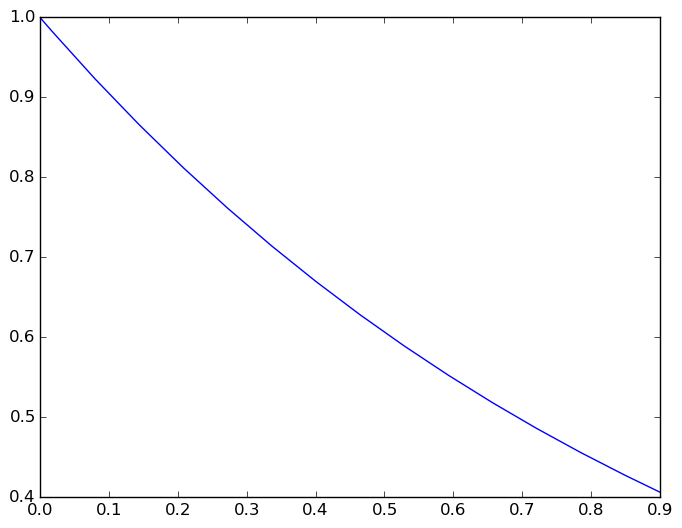

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xaa221d8c>

In [13]:
plot(X,Y)

In [30]:
function newton(f, df, x::FloatingPoint, eps)
    while abs(f(x)) > eps
        x = x - f(x)/df(x)
    end
    x
end

newton (generic function with 2 methods)

In [31]:
newton(x -> x.^2 - 2, x -> 2.*x, 1.0, 0.000001)

1.4142135623746899

In [39]:
T = 100.0 #Newtons
m_initial = 1.0 #Kg
burn_rate = 0.1 #Kg/sec
propellant_fraction = 0.7 #1
phi = 0.0
g = 9.8 # m/sec^2

9.8

In [122]:
T = 20.0 #Newtons
m_initial = 1.0 #Kg
burn_rate = 0.1 #Kg/sec
propellant_fraction = 0.7 #1
phi = 0.0
g = 9.8 # m/sec^2
function rocket(t, X)
    x = X[1]; vx = X[2]; y = X[3]; vy = X[4]; theta=X[5]; vtheta=X[6]; m=X[7];
    thrusting = m > (1-propellant_fraction)*m_initial
    if thrusting
        thrust = T
    else
        thrust = 0.0
    end
    [   vx, 
        thrust/m * cos(theta + phi),
        vy,
        -g + thrust/m * sin(theta + phi),
        vtheta,
        atan2(vy, vx) - theta,
        thrusting ? -burn_rate : 0.0 ]
end
initial_conditions = [0.0,0.0,0.0,0.0,1.4,0.0, m_initial];
T, Rocket = ode23(rocket, initial_conditions, [0.0:0.01:20.0]);

In [125]:
function shooting(angle, desired_point, tolerance)
    err_dist = Inf
    
    while err_dist > tolerance
        initial_conditions = [0.0, 0.0, 0.0, 0.0, angle, 0.0, m_initial]
        Times = [0.0:0.01:10.0]
        T, Rocket = ode23(rocket, initial_conditions, Times)
        
        closest_index = 1
        for i in 1:length(Rocket)
            if abs(Rocket[i][1] - desired_point[0]) < abs(Rocket[i][1] - Rocket[closest_index][1])
                closest_index = i
            end
        end
        err_dist = desired_point[2] - Rocket[closest_index][3]
        angle = angle + 0.1*tanh(err_dist)
    end
    [0.0, 0.0, 0.0, 0.0, angle, 0.0, m_initial]
end

shooting (generic function with 1 method)

In [126]:
shooting(1.4, [100,20], 0.01)

LoadError: arrays could not be broadcast to a common size
while loading In[126], in expression starting on line 1

In [123]:
X = zeros(length(Rocket))
Y = zeros(length(Rocket))
VX = zeros(length(Rocket))
for i in 1:length(Rocket)
    X[i] = Rocket[i][1]
    VX[i] = Rocket[i][2]
    Y[i] = Rocket[i][3]
end

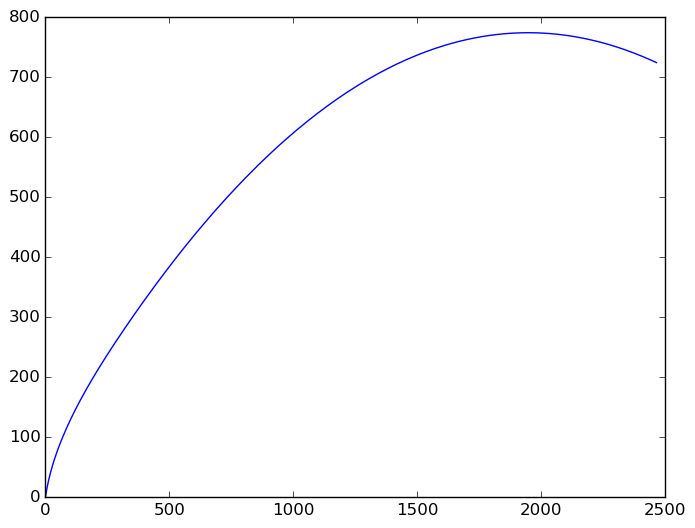

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xa80aabac>

In [124]:
plot(X,Y)